# **DATA 602 Final Project**

**Joyce Aldrich Dec.2024**

**1.Research Question**

What patterns or characteristics can help me identify fraudulent transactions in a dataset? By analyzing transaction attributes such as categorical features and available data in hand, I aim to uncover the factors contributing to fraud detection accuracy.

**2.Justification - why is this relevant to you or industry?**

I have been working in the banking industry for the past 7 years, primarily focusing on Compliance-related roles. Compliance and fraud detection often overlap, as both aim to ensure the integrity of financial systems and safeguard against risks.

This project will help me deepen my understanding of fraud detection from a developmental perspective, allowing me to gain hands-on experience in analyzing patterns, designing solutions, and interpreting results. It aligns with my professional interests and equips me with the skills necessary to address evolving challenges in fraud prevention within the banking industry.

**3.Data Sources - did you find this data online or collect yourself? Provide links.**
The dataset for this project is sourced from Kaggle: Fraud Detection Dataset
https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example/data

**4.Libraries potentially being used.**

Pandas: To load and manipulate tabular data.
Numpy: For performing numerical calculations and managing multidimensional arrays.
Matplotlib/Seaborn: For data visualization, including histograms, scatter plots, heatmaps, and bar charts, to understand relationships between features and fraud.
Scikit-learn: For machine learning tasks such as data splitting, model building, and performance evaluation.

**5.EDA and summary statistics.**

Try to understand class distribution, feature correlation, transaction time and amount, categorical features, and outliers.


**Appendix**
Content Descriptions:

step - unit of time (1 hour)

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - transaction amount in local currency.

nameOrig - transaction originator

oldbalanceOrg - initial balance (before transaction)

newbalanceOrig - new balance (after transaction)

nameDest - transaction recipient

oldbalanceDest - initial balance before transaction.

newbalanceDest - new balance after transaction.

isFraud - Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out.

isFlaggedFraud - An illegal attempt to transfer massive amount of money in a single transaction.






In [1]:
# Import Libraries 
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("/Users/joycealdrich/Documents/SPS Data Science/DATA 602/Final Project/fraud_dataset_example.csv")

# Show first 5 rows in the data
print(data.head(5))


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
# Check for missing values 
# There is no missing values observed
print(data.isnull().sum())

# Information for the dataset
# Total 101,613 rows (observations) 
# 11 columns contains 3 int, 5 float, and 3 object datatype
print(data.shape)
print(data.info())

# Summary statistics
# Noticed that "isFlaggedFraud" only has same value which means this column is not useful for further process
print(data.describe())

# Check unique values in unique values for each column in dataset
print(data.nunique())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
(101613, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memor

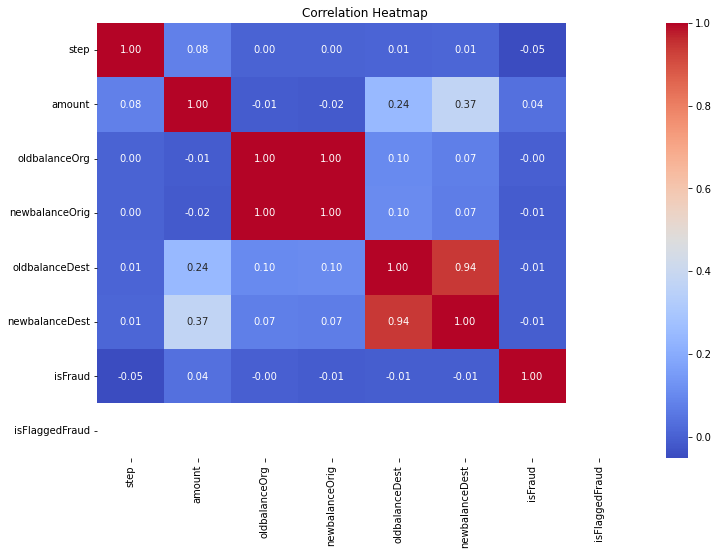

In [4]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  
    fmt=".2f",   
    cmap="coolwarm",  
    cbar=True   
)

# create title
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# drop "isFlaggedFraud" column in the dataset, it's not useful based on the correlation heat map
data = data.drop(columns = ['isFlaggedFraud'])

# confirm 
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [6]:
# Filter for fraudulent transactions (isFraud = 1)
fraudulent_transactions = data[data["isFraud"] == 1]

# Group by payee (nameDest), and aggregate the count or sum of transactions
fraud_grouped = fraudulent_transactions.groupby(["nameDest"]).agg(
    transaction_count=("amount", "count"),  # Count of transactions
    total_amount=("amount", "sum")         # Total amount of transactions
).reset_index()

# Sort by total_amount in descending order for better insights
fraud_grouped = fraud_grouped.sort_values(by="transaction_count", ascending=False)

# Display the result
print(fraud_grouped)

# Filter for fraudulent transactions (isFraud = 1)
not_fraudulent_transactions = data[data["isFraud"] == 0]

# Group by payee (nameDest), and aggregate the count or sum of transactions
not_fraud_grouped = not_fraudulent_transactions.groupby(["nameDest"]).agg(
    transaction_count=("amount", "count"),  # Count of transactions
    total_amount=("amount", "sum")         # Total amount of transactions
).reset_index()

# Sort by total_amount in descending order for better insights
not_fraud_grouped = not_fraud_grouped.sort_values(by="transaction_count", ascending=False)

# Display the result
print(not_fraud_grouped)


# Group by payee (nameDest), and aggregate the count or sum of transactions
payee_grouped = data.groupby(["nameDest"]).agg(
    transaction_count=("amount", "count"),  # Count of transactions
    total_amount=("amount", "sum")         # Total amount of transactions
).reset_index()

# Sort by total_amount in descending order for better insights
payee_grouped = payee_grouped.sort_values(by="transaction_count", ascending=False)

# Display the result
print(payee_grouped)




        nameDest  transaction_count  total_amount
72    C410033330                  2     133781.84
86    C573200870                  1      22877.00
84    C570409417                  1      29707.86
83    C560041895                  1      86070.17
82    C553264065                  1        181.00
..           ...                ...           ...
34   C1748042844                  1      89631.24
33   C1726301214                  1    5460002.91
32   C1711105800                  1      18627.02
31    C170071280                  1      29707.86
114   C991505714                  1     963532.14

[115 rows x 3 columns]
          nameDest  transaction_count  total_amount
12121   C985934102                 78   27870497.48
1835   C1286084959                 72   25203452.55
7514    C248609774                 71   33456497.77
3750   C1590550415                 70   35496917.97
12064   C977993101                 66   13315708.78
...            ...                ...           ...
23563  M1553

Observation: 
Each row of payer are unique
Dataset shows identical payee received multiple transactions from unique payer did not give further useful information to leverage the dataset which decide to drop payee and payer columns. 

In [7]:
# Drop the 'nameOrig' and 'nameDest' columns
data = data.drop(columns=["nameOrig", "nameDest"])

# Confirm the changes
print(data.head())

   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0  


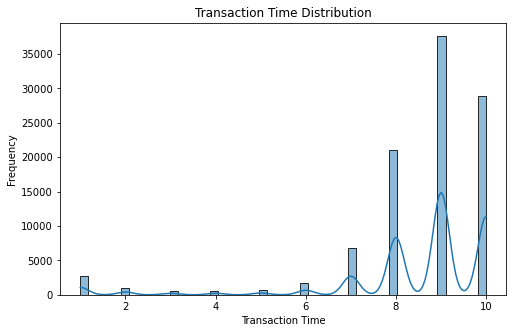

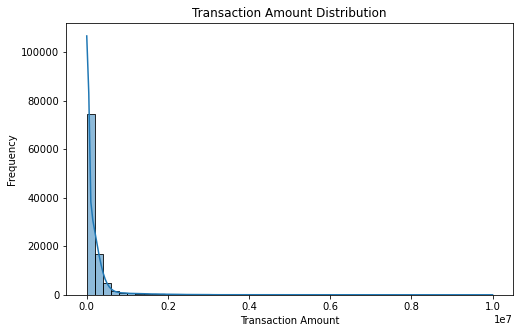

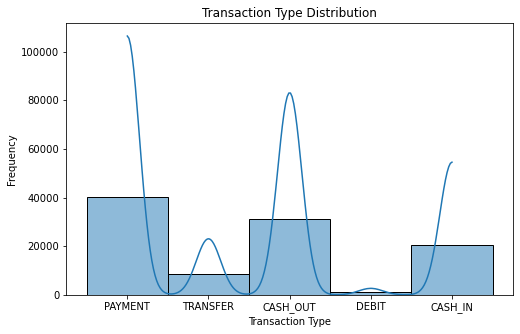

In [8]:
# Plot transaction time distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['step'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()

# Plot transaction amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plot transaction type distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['type'], bins=50, kde=True)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.show()


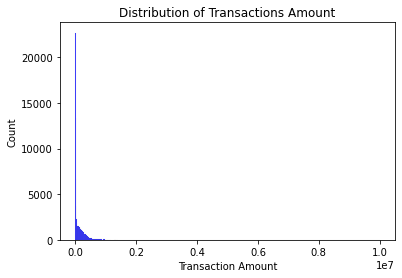

In [9]:
# Create a histogram for "amount" factor
sns.histplot(data=data, x="amount",color="blue")

# Add titles and labels
plt.title("Distribution of Transactions Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")

# Display the plot
plt.show()

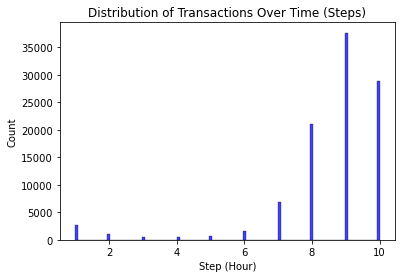

In [10]:
# Create a histogram for "step" factor
sns.histplot(data=data, x="step",color="blue")

# Add titles and labels
plt.title("Distribution of Transactions Over Time (Steps)")
plt.xlabel("Step (Hour)")
plt.ylabel("Count")

# Display the plot
plt.show()

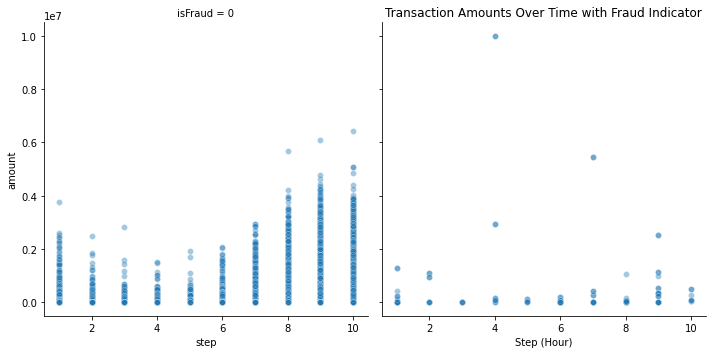

In [11]:
# Create relational plots, based on the transaction type and 'isFraud' value
sns.relplot(
    data=data, 
    x="step", 
    y="amount", 
    col="isFraud", 
    kind="scatter", 
    alpha=0.4
)

# Add titles and labels
plt.title("Transaction Amounts Over Time with Fraud Indicator")
plt.xlabel("Step (Hour)")
plt.ylabel("Transaction Amount")

# Show the plot
plt.show()

In [12]:
# Sort top 10 fraudlent transactions 
fraud_txn= data[data["isFraud"] == 1].sort_values(by="amount", ascending=False)

print(fraud_txn.head(10))

       step      type       amount  oldbalanceOrg  newbalanceOrig  \
4441      4  CASH_OUT  10000000.00    10000000.00            0.00   
4440      4  TRANSFER  10000000.00    12930418.44      2930418.44   
10395     7  TRANSFER   5460002.91     5460002.91            0.00   
10396     7  CASH_OUT   5460002.91     5460002.91            0.00   
4442      4  TRANSFER   2930418.44     2930418.44            0.00   
4443      4  CASH_OUT   2930418.44     2930418.44            0.00   
49826     9  CASH_OUT   2539898.07     2539898.07            0.00   
49825     9  TRANSFER   2539898.07     2539898.07            0.00   
969       1  TRANSFER   1277212.77     1277212.77            0.00   
970       1  CASH_OUT   1277212.77     1277212.77            0.00   

       oldbalanceDest  newbalanceDest  isFraud  
4441              0.0      9941904.21        1  
4440              0.0            0.00        1  
10395             0.0            0.00        1  
10396             0.0      9281535.44       

Observation: Among the top 5 fraudulent transactions, most are located at steps 4 and 7. 
Additionally, the highest fraudulent transaction amount is $10,000,000.

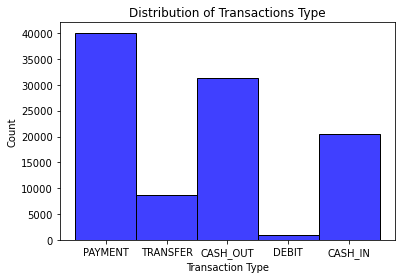

In [13]:
# Create a histogram for "type" factor
sns.histplot(data=data, x="type",color="blue")

# Add titles and labels
plt.title("Distribution of Transactions Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

# Display the plot
plt.show()

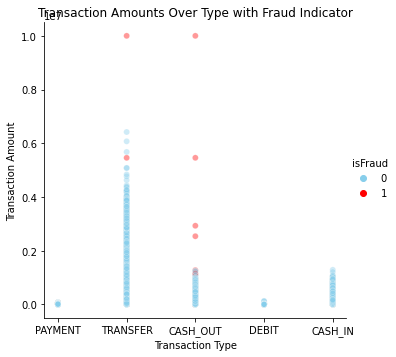

In [14]:
# Create relational plots, based on the transaction type for each 'isFraud' value
sns.relplot(
    data=data, 
    x="type", 
    y="amount", 
    hue="isFraud", 
    kind="scatter", 
    palette={0: "skyblue", 1: "red"}, 
    alpha=0.4, 
)

# Add titles and labels
plt.title("Transaction Amounts Over Type with Fraud Indicator")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")

# Show the plot
plt.show()

Observation: Fraudlent transaction only occured in transafer and cash_out transaction type.


In [15]:
# Preparation for Modeling 
#convert 'type' to dummy variables
type_dummies = pd.get_dummies(data['type'], prefix='type', drop_first=True)

# Drop the original 'type' column and merge the dummies into the DataFrame
data = pd.concat([data.drop(columns=['type']), type_dummies], axis=1)

# Confirm the changes
print(data.head(10))

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64      170136.00       160296.36             0.0   
1     1   1864.28       21249.00        19384.72             0.0   
2     1    181.00         181.00            0.00             0.0   
3     1    181.00         181.00            0.00         21182.0   
4     1  11668.14       41554.00        29885.86             0.0   
5     1   7817.71       53860.00        46042.29             0.0   
6     1   7107.77      183195.00       176087.23             0.0   
7     1   7861.64      176087.23       168225.59             0.0   
8     1   4024.36        2671.00            0.00             0.0   
9     1   5337.77       41720.00        36382.23         41898.0   

   newbalanceDest  isFraud  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0            0.00        0              0           0             1   
1            0.00        0              0           0             1   
2            0.00        1            

In [16]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Ensure the dataset is loaded as `data` and properly preprocessed

# Split the data into features (X) and target (y)
X = data.drop(columns=["isFraud"])  # Features
y = data["isFraud"]  # Target variable

# Split the data into training and testing sets (20 for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
score = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {score:.4f}")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, predictions))



Accuracy Score: 0.9990
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.58      0.48      0.52        23

    accuracy                           1.00     20323
   macro avg       0.79      0.74      0.76     20323
weighted avg       1.00      1.00      1.00     20323



In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)


[[20292     8]
 [   12    11]]


Accuracy:
The accuracy score of 0.999 indicates that this model correctly classified 99.9% of transactions overall.
Based on this result, this accuracy score can be misleading for imbalanced datasets due to the most transactions are non-fraudulent. 

Classification Report:
For Non-Fraudulent Transactions: 
Precision: Highly confident in its predictions for non-fraudulent transactions, with no false positives.
Recall: Correctly identifies all non-fraudulent transactions.
F1-score: 1.00

For Fraudulent Transactions: 
Precision: 57% of the transactions predicted as fraudulent are actually fraudulent.
Recall: Only identified 41% of fraudulent transaction
F1-score: 0.48. (*there is improvement in detecting)
 
Overall: 
1. Excellent performance for non-fraudulent transactions. 
2. Significant limitations in identifying fraudulent transactions.

Conclusion: 

Key Takeaways:
1. The model is very effective at identifying non-fraudulent transactions but has difficulty detecting fraudulent ones.
2. The imbalance in the dataset, with fraudulent transactions being a very small proportion, significantly affects recall and precision.

Areas for Improvement:
1. Experiment with more advanced models, such as Random Forest and Gradient Boosting, to improve fraud detection performance.
2. Consider adding more features to enhance the model's ability to identify fraudulent patterns. The current features (transaction amount, type, and time) are essential but may not capture all fraud-related patterns effectively due to the limited number of features.